In [2]:
## Echo Python Version to be sure it is from virtual environment
import sys
print(sys.version_info)

sys.version_info(major=3, minor=12, micro=2, releaselevel='final', serial=0)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Definitions
1. **Nominal interest** rates are set by government. 
Also, for different period (such as 5, 10, 15, etc.. **Zinsbindungszeit**) of fixed interest (**Zinsbindungsfrist**) have different rates.
Please [follow the graph](https://hypofriend.de/en/german-mortgage-calculator) to get present value of fixed interest rate for each period.
3. Annual bank **nominal interest rate** is compounded over 12 months. Therefore, **periodic interest rate** = nominal_interest_rate / 12
4. **Principal** amount does not include notary fees, real estate agent fees, grundwerbsteuer
5. We as customers can decide on **principal repayment rate**. Cannot be lesser than 1.5%
6. Fixed monthly payment can be derived by adding the periodic_interest_rate + periodic_prepayment_rate
7. Based on fixed monthly payments, we can then calculate how many years we need to pay the loan (**Annuitätendarlehen Laufzeit**)

### Example Amortized Fixed Monthly Payment Calculator
**number of compounding period** is fixed in the following case. <br/>
However, in reality this is calculated based on fixed monthly payment rate. <br/>
Following is an example using the amortized loan formula to calculate the fixed monthly payment

In [4]:
# Using the amortized loan formula, calculating the fixed monthly payments
PRINCIPAL_AMOUNT = 100000
BANK_INTEREST_RATE = 3.82 / 100
PREPAYMENT_RATE = 2.0
MONTHS_IN_YEAR = 12
ANNUAL_COMPOUNDING_PERIOD = MONTHS_IN_YEAR
PERIODIC_INTEREST_RATE = BANK_INTEREST_RATE/ANNUAL_COMPOUNDING_PERIOD
print("Periodic Interest Rate: ", PERIODIC_INTEREST_RATE)
TOTAL_COMPOUNDING_PERIODS = 28 * ANNUAL_COMPOUNDING_PERIOD
print("Total compounding period over 28 years: ", TOTAL_COMPOUNDING_PERIODS)
INTEREST_RATE_POW = math.pow((1 + PERIODIC_INTEREST_RATE), TOTAL_COMPOUNDING_PERIODS)

Fixed_Monthly_Payments = (PERIODIC_INTEREST_RATE * PRINCIPAL_AMOUNT * INTEREST_RATE_POW) / (INTEREST_RATE_POW - 1)
print("Fixed monthly payments: ", Fixed_Monthly_Payments)

Periodic Interest Rate:  0.003183333333333333
Total compounding period over 28 years:  336
Fixed monthly payments:  485.0639865985084


## Calculator of Loan Period (Annuitätendarlehen Laufzeit)
It can be calculated if following are known with this [formula](https://math.stackexchange.com/questions/3185889/how-do-i-solve-for-n-number-of-periods-in-a-loan-repayment-formula)
* **principal**
* **nominal interest rate**
* **principal repayment rate**

In [5]:
# YOU CAN VARY ONLY THE FOLLOWING VALUES
PRINCIPAL_AMOUNT = 100000
BANK_INTEREST_RATE = 3.82 / 100
PREPAYMENT_RATE = 2.0 / 100
MONTHS_IN_YEAR = 12

# Calculate Fixed Monthly Payments
ANNUAL_COMPOUNDING_PERIOD = MONTHS_IN_YEAR
PERIODIC_INTEREST_RATE = BANK_INTEREST_RATE / ANNUAL_COMPOUNDING_PERIOD
print("Periodic Interest Rate: ", PERIODIC_INTEREST_RATE)
PERIODIC_PRINCIPAL_REPAY_RATE = PREPAYMENT_RATE / ANNUAL_COMPOUNDING_PERIOD
print("Periodic Principal Repayment Rate: ", PERIODIC_PRINCIPAL_REPAY_RATE)
FIXED_MONTHLY_PAYMENT = (PERIODIC_INTEREST_RATE + PERIODIC_PRINCIPAL_REPAY_RATE) * PRINCIPAL_AMOUNT
print("Fixed monthly payment: ", FIXED_MONTHLY_PAYMENT)

# Calculate Total Loan Period
LOAN_PERIOD = math.log(FIXED_MONTHLY_PAYMENT / (FIXED_MONTHLY_PAYMENT - (PERIODIC_INTEREST_RATE * PRINCIPAL_AMOUNT)), 1 + PERIODIC_INTEREST_RATE)
LOAN_PERIOD_IN_YEARS = LOAN_PERIOD / MONTHS_IN_YEAR
print("Number of years to payback the loan: ", LOAN_PERIOD_IN_YEARS)

Periodic Interest Rate:  0.003183333333333333
Periodic Principal Repayment Rate:  0.0016666666666666668
Fixed monthly payment:  485.0
Number of years to payback the loan:  28.006605346853167


In [20]:
starting_data = {
    "princip_remain": [PRINCIPAL_AMOUNT],
    "princip_repaid_amt": [0],
    "interest_paid_amt": [0],
    "monthly_payment": [0]
}
periodic_loan_calc = pd.DataFrame(starting_data)
for prev_period_num in range(int(LOAN_PERIOD)):
    principal_prev_period = periodic_loan_calc.at[prev_period_num, "princip_remain"]
    interest_paid = PERIODIC_INTEREST_RATE * principal_prev_period
    principal_repaid = FIXED_MONTHLY_PAYMENT - interest_paid
    remaining_principal_amt = principal_prev_period - principal_repaid
    period_data = {
        "princip_remain": remaining_principal_amt,
        "princip_repaid_amt": principal_repaid,
        "interest_paid_amt": interest_paid,
        "monthly_payment": principal_repaid + interest_paid
    }
    period_df = pd.DataFrame([period_data])
    periodic_loan_calc = pd.concat([periodic_loan_calc, period_df], ignore_index=True)
    periodic_loan_calc = periodic_loan_calc.round(decimals=2)

print(periodic_loan_calc)

total_interest_paid = periodic_loan_calc['interest_paid_amt'].sum()
print("Total Interest paid at the loan period: ", total_interest_paid)

     princip_remain  princip_repaid_amt  interest_paid_amt  monthly_payment
0         100000.00                0.00               0.00              0.0
1          99833.33              166.67             318.33            485.0
2          99666.13              167.20             317.80            485.0
3          99498.40              167.73             317.27            485.0
4          99330.14              168.26             316.74            485.0
..              ...                 ...                ...              ...
332         1962.70              477.23               7.77            485.0
333         1483.95              478.75               6.25            485.0
334         1003.67              480.28               4.72            485.0
335          521.87              481.80               3.20            485.0
336           38.53              483.34               1.66            485.0

[337 rows x 4 columns]
Total Interest paid at the loan period:  62998.52999999999


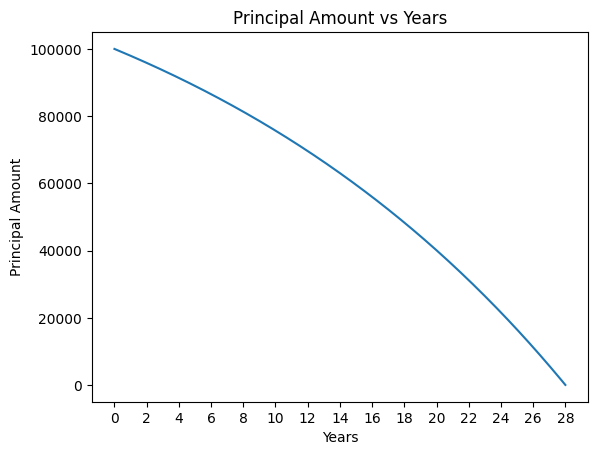

In [37]:
x = periodic_loan_calc.index
y = periodic_loan_calc['princip_remain']
plt.plot(x, y)
# Show ticks only for following values
period_tick = [i for i in x.to_list() if i % 24 == 0]
# While labelling ticks show them as years
plt.xticks(period_tick, labels=[str(int(i / 12)) for i in period_tick])
plt.xlabel("Years")
plt.ylabel("Principal Amount")
plt.title('Principal Amount vs Years')
plt.show()